In [1]:
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [2]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)

from time_analysisss import load_data

df = load_data("../data/raw/NS-time table for Upward.csv")



In [3]:
import sys
sys.path.append('../scripts')  # adjust if needed

import importlib
import passenger_flow_utils
importlib.reload(passenger_flow_utils)

from passenger_flow_utils import basic_checks


In [4]:
basic_checks(df)

--- Shape ---
(45, 69)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stations        45 non-null     object
 1   Stations_code   45 non-null     object
 2   Train times     45 non-null     object
 3   20502           45 non-null     object
 4   20602           45 non-null     object
 5   20702           45 non-null     object
 6   20802           45 non-null     object
 7   20902           45 non-null     object
 8   20104           45 non-null     object
 9   20204           45 non-null     object
 10  20304           45 non-null     object
 11  20404           45 non-null     object
 12  20504           45 non-null     object
 13  20604           45 non-null     object
 14  20704           45 non-null     object
 15  20804           45 non-null     object
 16  20904           45 non-null     object
 17  20106           45 

In [5]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import drop_high_nan_columns

df = drop_high_nan_columns(df, threshold=0.9)


Dropping columns with > 90.0% NaNs: []


In [6]:
# raname columns for better readability
df = df.rename(columns={'Stations_code ': 'station_id'})
df = df.rename(columns={'Train times': 'arrival_departure'})
df = df.rename(columns={'Stations ': 'Stations'})



In [7]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import melt_and_pivot_train_schedule

df_pivot = melt_and_pivot_train_schedule(df)


c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Arrival'] = pd.to_datetime(df_pivot['Arrival'], errors='coerce')
c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Departure'] = pd.to_datetime(df_pivot['Departure'], errors='coerce')


In [8]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import fill_missing_times_with_station_avg

df_pivot = fill_missing_times_with_station_avg(df_pivot)


In [9]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import calculate_dwell_time
df_pivot = calculate_dwell_time(df_pivot)


In [10]:
basic_checks(df_pivot)

--- Shape ---
(1518, 6)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Stations    1518 non-null   object         
 1   station_id  1518 non-null   object         
 2   train_id    1518 non-null   object         
 3   Arrival     1518 non-null   datetime64[ns] 
 4   Departure   1518 non-null   datetime64[ns] 
 5   Dwell Time  1518 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 71.3+ KB

--- Null Values ---
arrival_departure
Stations      0
station_id    0
train_id      0
Arrival       0
Departure     0
Dwell Time    0
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       1518   
mean               2025-07-29 14:02:12.652174080   
min                          2025-07-29 05:58:56

In [11]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import check_null
check_null(df_pivot)

arrival_departure
Stations      0.0
station_id    0.0
train_id      0.0
Arrival       0.0
Departure     0.0
Dwell Time    0.0
dtype: float64


In [12]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats

station_stats = compute_station_gap_stats(df_pivot)

Computed station gap stats:
                    Stations    Avg_Gap   Min_Gap  Max_Gap   Gap_Std
10  Menilik II Square T22702   7.040373  0.000000     17.0  7.297031
7              Kality T20618  14.764103  5.866667     23.0  3.314762
2                 Adey Ababa  14.769231  6.000000     23.0  3.306099
0                      Abnet  14.769231  6.000000     23.0  3.306099
3             Atikilt Tera    14.769231  6.000000     23.0  3.306099


In [13]:
df_pivot["Dwell Time"]

0      0 days 00:00:25
1      0 days 00:00:25
2      0 days 00:00:25
3      0 days 00:00:25
4      0 days 00:00:25
             ...      
1513   0 days 00:00:25
1514   0 days 00:00:25
1515   0 days 00:00:25
1516   0 days 00:00:25
1517   0 days 00:00:25
Name: Dwell Time, Length: 1518, dtype: timedelta64[ns]

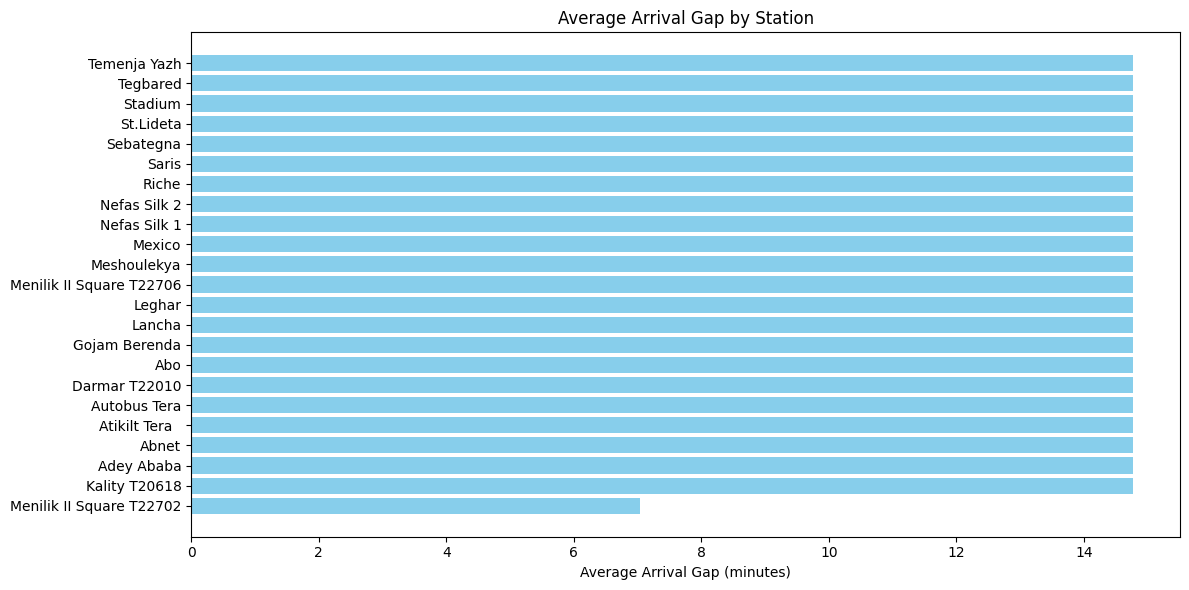

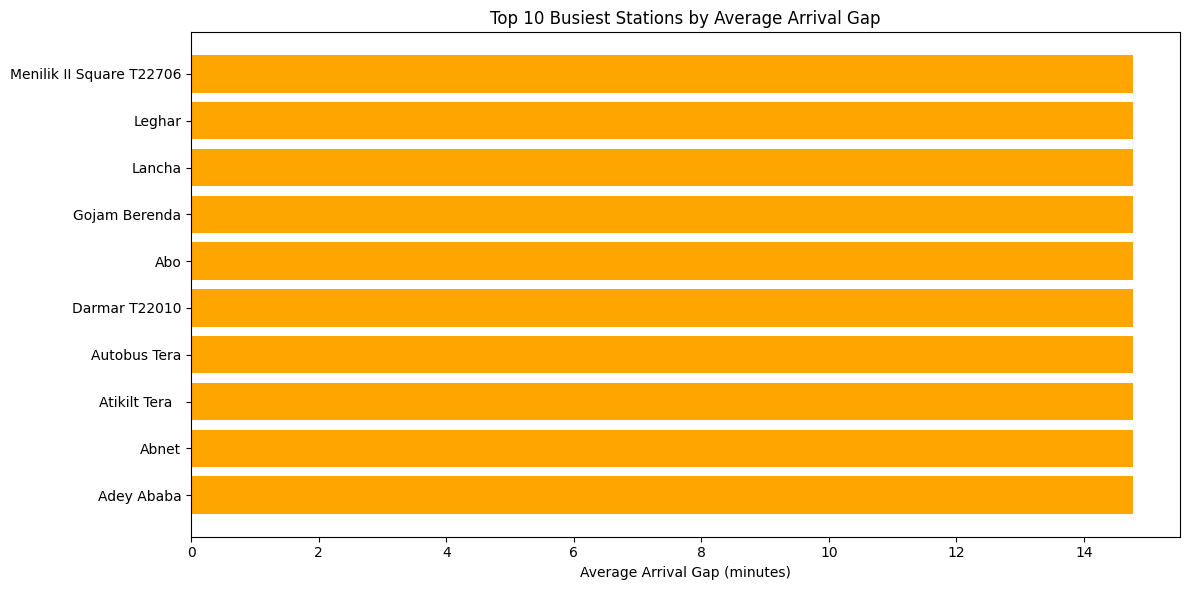

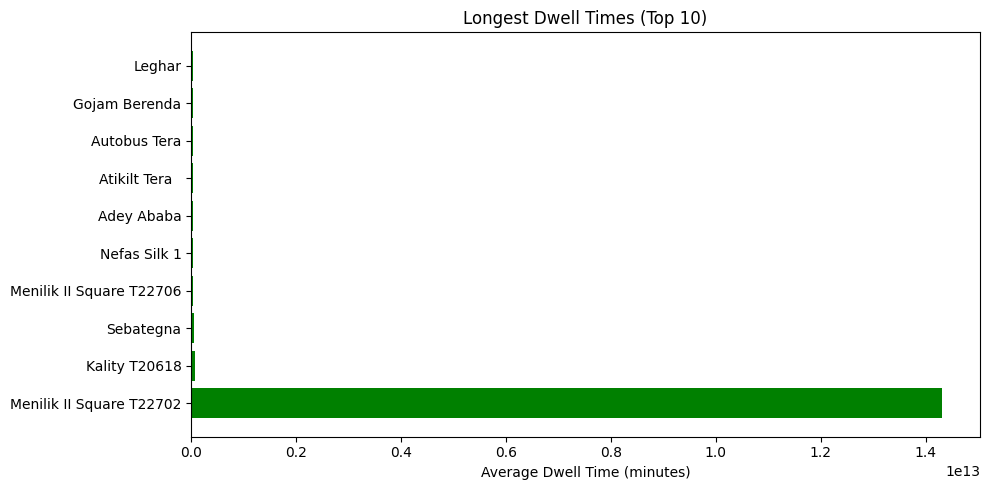

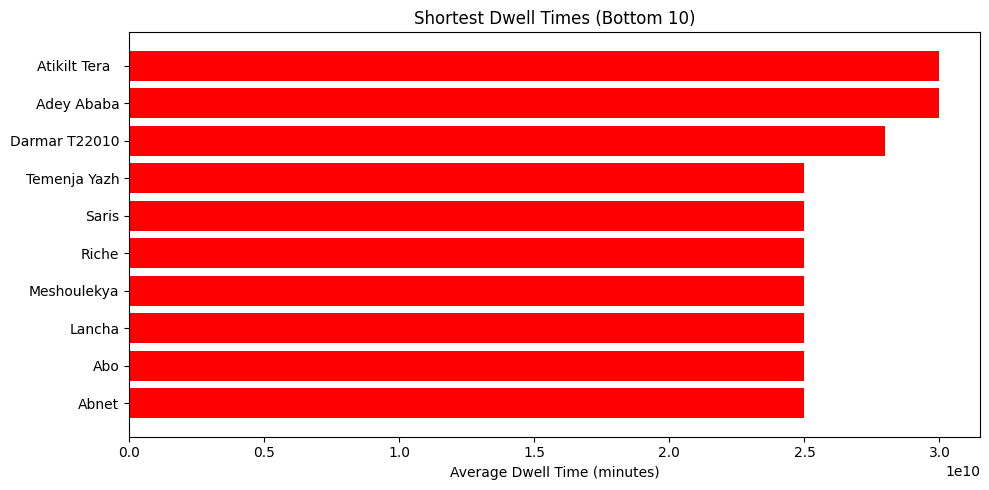

In [14]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

plot_utils.plot_avg_arrival_gap(station_stats)
plot_utils.plot_top_avg_gaps(station_stats)
plot_utils.plot_dwell_time_extremes(df_pivot)


In [15]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import check_null
check_null(df_pivot)

arrival_departure
Stations      0.0
station_id    0.0
train_id      0.0
Arrival       0.0
Departure     0.0
Dwell Time    0.0
dtype: float64


In [16]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')

In [17]:
# PRINT HOW MUCH OF THE DATA IS MISSING
missing_data = df_pivot.isnull().mean() * 100
print(missing_data[missing_data > 0])  # only print columns with missing data

Series([], dtype: float64)


In [18]:
df_pivot["Dwell Time"]

0      0 days 00:00:25
1      0 days 00:00:25
2      0 days 00:00:25
3      0 days 00:00:25
4      0 days 00:00:25
             ...      
1513   0 days 00:00:25
1514   0 days 00:00:25
1515   0 days 00:00:25
1516   0 days 00:00:25
1517   0 days 00:00:25
Name: Dwell Time, Length: 1518, dtype: timedelta64[ns]

In [19]:
#save df_privot as csv
df_pivot.to_csv('../data/processed/NS-time table for_processed_Upward.csv', index=False)